In [2]:
from datasets import load_dataset

train_data = load_dataset("food101", split="train[:10000]")

val_data = load_dataset("food101", split="validation[:3000]")


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

In [3]:
train_data

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [4]:
val_data

Dataset({
    features: ['image', 'label'],
    num_rows: 3000
})

In [5]:
split = val_data.train_test_split(0.5)

In [6]:
split

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
})

In [7]:
val_data = split['train']

In [8]:
val_data

Dataset({
    features: ['image', 'label'],
    num_rows: 1500
})

In [9]:
test_data = split['test']

In [10]:
test_data

Dataset({
    features: ['image', 'label'],
    num_rows: 1500
})

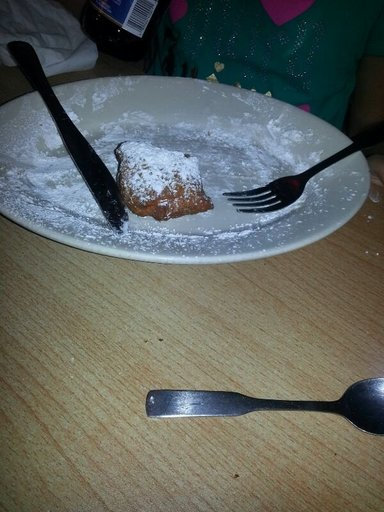

In [11]:
train_data[0]["image"]


In [12]:
labels = train_data.features["label"].names
labels

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [13]:
label2id, id2label = {}, {}
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[0], label2id["apple_pie"]


('apple_pie', 0)

In [14]:
from transformers import AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

processor

2025-05-20 10:41:55.646793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747737715.886122      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747737715.955921      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [15]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=processor.image_mean, std=processor.image_std)
if "height" in processor.size:
    size = (processor.size["height"], processor.size["width"])
    crop_size = size
    

train_transforms = Compose(
        [
            RandomResizedCrop(crop_size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(crop_size),
            ToTensor(),
            normalize,
        ]
    )

test_transforms = Compose(
    [
        Resize(size),
        CenterCrop(size),
        ToTensor(),
        normalize,
    ]
)

def preprocess_train(example_batch):
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

def preprocess_test(example_batch):
    example_batch['pixel_values'] = [val_transforms(image.convert("RGB")) for image in example_batch['image']]
    return example_batch

In [16]:
train_data.set_transform(preprocess_train)
val_data.set_transform(preprocess_val)
test_data.set_transform(preprocess_test)

In [17]:
train_data[0]

{'image': <PIL.Image.Image image mode=RGB size=384x512>,
 'label': 6,
 'pixel_values': tensor([[[-0.2549, -0.2706, -0.1765,  ..., -0.3804, -0.3490, -0.2471],
          [-0.2157, -0.2078, -0.2078,  ..., -0.3412, -0.3098, -0.2314],
          [-0.2235, -0.2000, -0.2078,  ..., -0.2784, -0.2784, -0.2549],
          ...,
          [ 0.1137,  0.1608,  0.1686,  ..., -0.0902, -0.1373, -0.1922],
          [ 0.1529,  0.1922,  0.1686,  ..., -0.1059, -0.1373, -0.1843],
          [ 0.1686,  0.1451,  0.1686,  ..., -0.1373, -0.0980, -0.0510]],
 
         [[-0.0588, -0.0745,  0.0196,  ..., -0.3882, -0.3569, -0.2549],
          [-0.0275, -0.0118, -0.0196,  ..., -0.3490, -0.3176, -0.2392],
          [-0.0510, -0.0196, -0.0353,  ..., -0.2863, -0.2863, -0.2627],
          ...,
          [ 0.0980,  0.1373,  0.1451,  ..., -0.0667, -0.1059, -0.1686],
          [ 0.1137,  0.1608,  0.1373,  ..., -0.0902, -0.1216, -0.1608],
          [ 0.1216,  0.0980,  0.1216,  ..., -0.1294, -0.0902, -0.0510]],
 
         [[ 0.

In [18]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model_name = 'google-vit-Base'
batch_size = 16  # from hugging face description

In [21]:
import transformers
print(transformers.__version__)

4.51.3


In [22]:
import accelerate
print(accelerate.__version__)

1.5.2


In [23]:
import torch
from accelerate import Accelerator

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

# Use accelerate to get device info
accelerator = Accelerator()
print("Accelerator device:", accelerator.device)

CUDA available: True
GPU: Tesla P100-PCIE-16GB
Accelerator device: cuda


In [24]:
from transformers import TrainingArguments

args = TrainingArguments(
    f"{model_name}-finetuned-food101",
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    report_to="none",
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
    disable_tqdm=False
)

In [25]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.9.0.13 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn

In [26]:
import evaluate

# Load the accuracy and F1 metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

In [27]:
import numpy as np
def compute_metrics(eval_pred):
    """Computes accuracy, F1 score, and confusion matrix on a batch of predictions."""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    references = eval_pred.label_ids

    # Compute accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=references)['accuracy']

    # Compute F1 score
    f1 = f1_metric.compute(predictions=predictions, references=references, average="weighted")['f1']


    return {
        "accuracy": accuracy,
        "f1": f1,
    }

In [28]:
#is used to combine pixel values and their corresponding labels into a batch of data ready for training.
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example['pixel_values'] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {'pixel_values':pixel_values,'labels':labels}

In [29]:
from transformers import Trainer

trainer = Trainer(
    model,
    args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn
)

/tmp/ipykernel_35/2417865765.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [30]:
train_result = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,3.486700,3.250231,0.879333,0.877777
2,2.098200,1.927785,0.935333,0.935479
3,1.564400,1.346589,0.963333,0.963905
4,1.184100,1.041396,0.965333,0.966217
5,1.023500,0.848170,0.968667,0.969575
6,0.815300,0.721835,0.967333,0.968828
7,0.741800,0.643872,0.968667,0.969998
8,0.689700,0.583080,0.972000,0.973025
9,0.619900,0.545665,0.970667,0.971978


In [34]:
trainer.save_model()
trainer.log_metrics("train", train_result.metrics)
trainer.save_metrics("train", train_result.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =       9.9408
  total_flos               = 7180645043GF
  train_loss               =       1.4582
  train_runtime            =   0:41:01.92
  train_samples_per_second =       40.619
  train_steps_per_second   =        0.634


In [32]:
metrics = trainer.evaluate()
trainer.log_metrics('eval',metrics)
trainer.save_metrics("eval",metrics)

***** eval metrics *****
  epoch                   =     9.9408
  eval_accuracy           =     0.9727
  eval_f1                 =      0.974
  eval_loss               =     0.5531
  eval_runtime            = 0:00:16.02
  eval_samples_per_second =     93.598
  eval_steps_per_second   =      5.865


In [35]:
outputs = trainer.predict(test_data)
print(outputs.metrics)

{'test_loss': 0.5741696953773499, 'test_accuracy': 0.9653333333333334, 'test_f1': 0.9661842680505165, 'test_runtime': 16.0213, 'test_samples_per_second': 93.625, 'test_steps_per_second': 5.867}


In [37]:
from huggingface_hub import notebook_login
notebook_login()

In [38]:
trainer.push_to_hub('Google-vit-finetuned-on-food101')

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Haaaaaaaaaax/google-vit-Base-finetuned-food101/commit/f7d4da5dfe84d558a73ee255ae1e576637bb2c35', commit_message='Google-vit-finetuned-on-food101', commit_description='', oid='f7d4da5dfe84d558a73ee255ae1e576637bb2c35', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Haaaaaaaaaax/google-vit-Base-finetuned-food101', endpoint='https://huggingface.co', repo_type='model', repo_id='Haaaaaaaaaax/google-vit-Base-finetuned-food101'), pr_revision=None, pr_num=None)

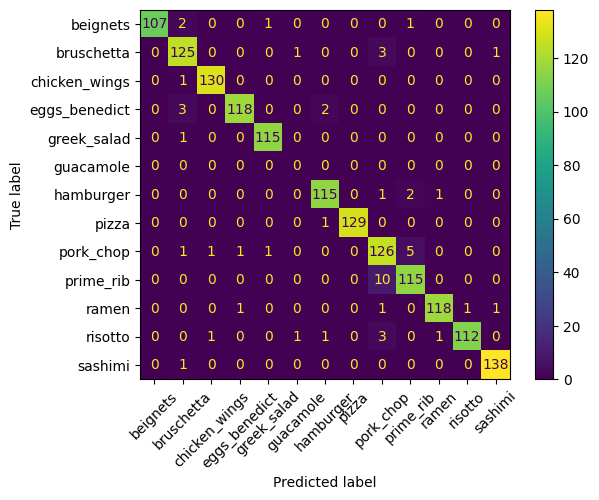

In [39]:
# we can't print the confusion matrix for 101 classes so i took a sample

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

# Get unique class indices that appear in the data
present_labels = np.unique(np.concatenate([y_true, y_pred]))

# Select only those label names
label_names = [train_data.features['label'].names[i] for i in present_labels]

# Compute CM limited to present labels
cm = confusion_matrix(y_true, y_pred, labels=present_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(xticks_rotation=45)


In [40]:
from sklearn.metrics import recall_score

recall = recall_score(y_true,y_pred,average=None)
for label,score in zip(labels,recall):
    print(f"Recall for {label}: {score:.2f}")

Recall for apple_pie: 0.96
Recall for baby_back_ribs: 0.96
Recall for baklava: 0.99
Recall for beef_carpaccio: 0.96
Recall for beef_tartare: 0.99
Recall for beet_salad: 0.00
Recall for beignets: 0.97
Recall for bibimbap: 0.99
Recall for bread_pudding: 0.93
Recall for breakfast_burrito: 0.92
Recall for bruschetta: 0.97
Recall for caesar_salad: 0.94
Recall for cannoli: 0.99


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix


# Calculate precision and recall for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

# Calculate specificity for each class
specificities = []
conf_matrix = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
for i, label in enumerate(labels):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Calculate overall metrics
overall_precision = precision_score(y_true, y_pred, average='weighted')
overall_recall = recall_score(y_true, y_pred, average='weighted')
overall_specificity = np.mean(specificities)  # Average specificity across all classes

# Print overall metrics
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall Specificity: {overall_specificity:.2f}")
print("************************************************************************************")

# Print precision, recall, and specificity for each label
for label, prec, rec, spec in zip(labels, precision, recall, specificities):
    print(f"Class '{label}': Precision = {prec:.2f}, Recall = {rec:.2f}, Specificity = {spec:.2f}")


Overall Precision: 0.97
Overall Recall: 0.97
Overall Specificity: 1.00
************************************************************************************
Class 'apple_pie': Precision = 1.00, Recall = 0.96, Specificity = 1.00
Class 'baby_back_ribs': Precision = 0.93, Recall = 0.96, Specificity = 1.00
Class 'baklava': Precision = 0.98, Recall = 0.99, Specificity = 1.00
Class 'beef_carpaccio': Precision = 0.98, Recall = 0.96, Specificity = 1.00
Class 'beef_tartare': Precision = 0.98, Recall = 0.99, Specificity = 1.00
Class 'beet_salad': Precision = 0.00, Recall = 0.00, Specificity = 1.00
Class 'beignets': Precision = 0.97, Recall = 0.97, Specificity = 1.00
Class 'bibimbap': Precision = 1.00, Recall = 0.99, Specificity = 1.00
Class 'bread_pudding': Precision = 0.88, Recall = 0.93, Specificity = 1.00
Class 'breakfast_burrito': Precision = 0.93, Recall = 0.92, Specificity = 1.00
Class 'bruschetta': Precision = 0.98, Recall = 0.97, Specificity = 0.99
Class 'caesar_salad': Precision = 0.99, 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
test_data

Dataset({
    features: ['image', 'label'],
    num_rows: 1500
})

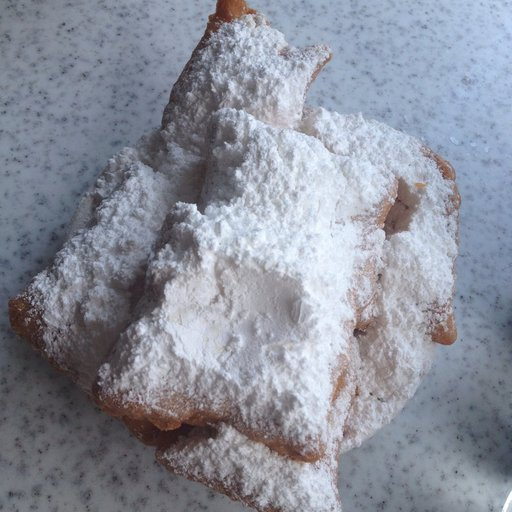

In [43]:
test_data[100]['image']

In [44]:
test_data[100]['label']

6

In [45]:
id2label[test_data[100]['label']]

'beignets'

In [46]:
# Load model directly
from PIL import Image
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("Haaaaaaaaaax/google-vit-Base-finetuned-food101")
model = AutoModelForImageClassification.from_pretrained("Haaaaaaaaaax/google-vit-Base-finetuned-food101")
# Load an image

image = test_data[100]['image']

# Preprocess the image
inputs = processor(images=image, return_tensors="pt") # return pythorch tensor

# Perform inference
with torch.no_grad(): #stop training
    outputs = model(**inputs)

# Get the predicted label
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class = predictions.argmax().item()

# Map the predicted class index to a label
labels = model.config.id2label
predicted_label = labels[predicted_class]

print(f"Predicted label: {predicted_label}")


preprocessor_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

Predicted label: beignets
